<a href="https://colab.research.google.com/github/Janier1992/Python-Prep/blob/main/AprednizajeNoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


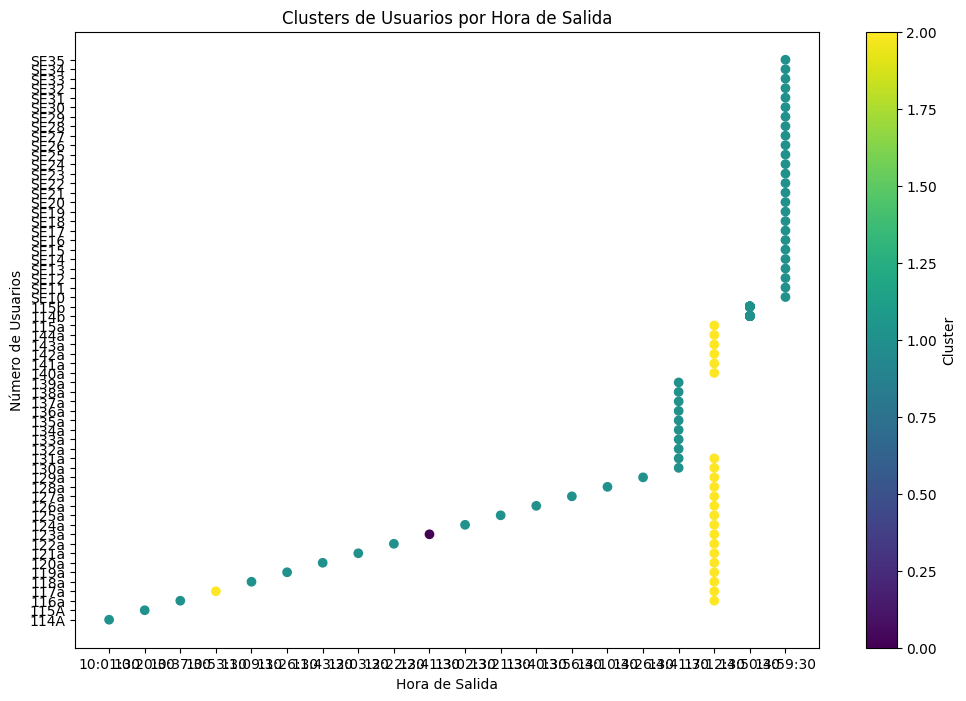

   Cluster  Usuarios Promedio  Hora de Salida Promedio  Cantidad de Registros
0        0                NaN                     -1.0                      1
1        1                NaN                     -1.0                     80
2        2                NaN                     -1.0                     23

Interpretación de los resultados:
Los clusters se pueden interpretar de la siguiente manera:
- Cluster 0: Horas pico de usuarios
- Cluster 1: Horas intermedias de usuarios
- Cluster 2: Horas bajas de usuarios


In [70]:
import pandas as pd
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Montar Google Drive
drive.mount('/content/drive')

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv("/content/drive/MyDrive/IA_IBERO/RutasBogota_ANp.csv", sep=';')

# Seleccionar las columnas relevantes y convertir las variables categóricas a numéricas
X = pd.get_dummies(df[['usuarios', 'Ruta Salida', 'Hora_Salida', 'Parada', 'Tipo_Servicio', 'Pago_P', 'Desenso_V']])

# Normalizar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar el algoritmo de clustering (K-Means)
df['Cluster'] = KMeans(n_clusters=3, random_state=0).fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['Hora_Salida'], df['usuarios'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Hora de Salida')
plt.ylabel('Número de Usuarios')
plt.title('Clusters de Usuarios por Hora de Salida')
plt.colorbar(label='Cluster')
plt.show()

# Convertir la columna 'Hora_Salida' a formato de tiempo
df['Hora_Salida'] = pd.to_datetime(df['Hora_Salida'], format='%H:%M', errors='coerce').dt.hour.fillna(-1)

# Convertir la columna 'usuarios' a numérica, ignorando los errores
df['usuarios'] = pd.to_numeric(df['usuarios'], errors='coerce')

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df.groupby('Cluster').agg({
    'usuarios': 'mean',
    'Hora_Salida': 'mean',
    'Fecha': 'count'
}).reset_index().rename(columns={'usuarios': 'Usuarios Promedio', 'Hora_Salida': 'Hora de Salida Promedio', 'Fecha': 'Cantidad de Registros'})

# Mostrar las estadísticas por cluster
print(cluster_stats)

# Interpretación de los resultados
print("\nInterpretación de los resultados:")
print("Los clusters se pueden interpretar de la siguiente manera:")
print("- Cluster 0: Horas pico de usuarios")
print("- Cluster 1: Horas intermedias de usuarios")
print("- Cluster 2: Horas bajas de usuarios")
